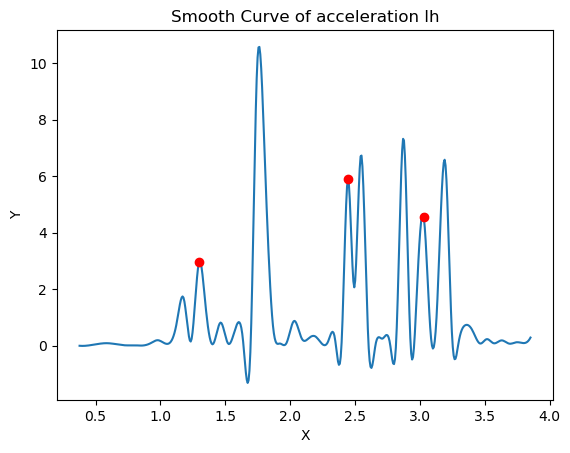

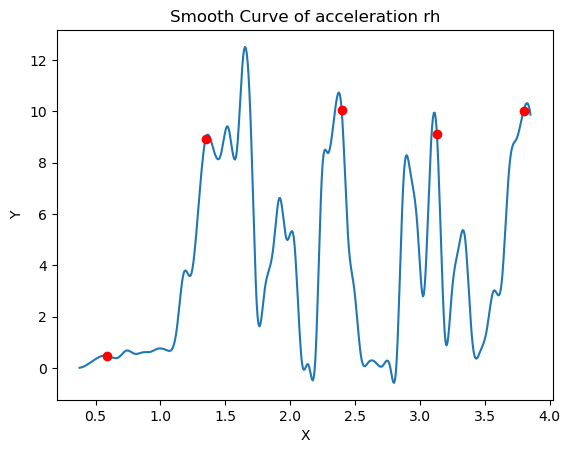

Stride length left:
49.60429641019819
Stride length right:
113.53610314368271
Cycle time left:
1.1484984000001077
Cycle time right:
0.7602191999999377
Average velocity of left heel:
43.1905664040921
Average velocity of right heel:
149.34653471484543
Cadence (left):
104.48425526756392
Cadence (right):
157.84920980686863


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import os

#function of smoothing data

def smooth_data(x, y, num_points, degree):
    X_Y_Spline = make_interp_spline(x, y)
 
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), num_points)
    Y_ = X_Y_Spline(X_)
    return X_,Y_

#function to get peaks
def get_highest_peak(data):
    mean = sum(data)/len(data)
    std_dev= (sum([(val-mean)**2 for val in data])/len(data-1))**0.5
    peak_x = []
    Threshold=0.75
    tmp=-10
    for i in range(1,len(data)-1):
        if(data[i] > data[i-1] and data[i]>data[i+1] ):
            if((abs(data[i]-mean)>Threshold*std_dev) and (i>(tmp+10))):
                peak_x.append(i)
                tmp=i
    peak_y = [data[index] for index in peak_x]
    return peak_x,peak_y


#Array for Plotting
df = pd.read_csv('data.csv')
time2plot=np.array(df.iloc[:, 0])

#Coordinate Array
plot_xlh = np.array(df.iloc[:, 9])
plot_ylh = np.array(df.iloc[:, 10])

plot_xrh = np.array(df.iloc[:, 11])
plot_yrh = np.array(df.iloc[:, 12])

plot_xlk = np.array(df.iloc[:, 17])
plot_ylk = np.array(df.iloc[:, 18])

plot_xrk = np.array(df.iloc[:, 19])
plot_yrk = np.array(df.iloc[:, 20])

#velocity array
velocity_lh = np.array(df.iloc[:, 25])
velocity_rh = np.array(df.iloc[:, 26])

#acceleration array
plot_acc_lh = np.array(df.iloc[:, 27])
plot_acc_rh = np.array(df.iloc[:, 28])

#angle array
plotangle_ltknee = np.array(df.iloc[:, 21])
plotangle_rtknee = np.array(df.iloc[:, 22])
plotangle_ltankle = np.array(df.iloc[:, 23])
plotangle_rtankle = np.array(df.iloc[:, 24])


# obtaining time array & acceleration array after smoothing
time_smooth_lh,acc_smooth_lh= smooth_data(time2plot, plot_acc_lh, 500, 3)
time_smooth_rh,acc_smooth_rh= smooth_data(time2plot, plot_acc_rh, 500, 3)

#obtaining peaks and corresponding index (kaj kore na)
indx_peak_lh, peak_y_lh = get_highest_peak(plot_acc_lh)
time_corr2peak_lh=[time2plot[index] for index in indx_peak_lh]
indx_peak_rh, peak_y_rh = get_highest_peak(plot_acc_rh)
time_corr2peak_rh=[time2plot[index] for index in indx_peak_rh]

#plot to check peaks are okay
plt.plot(time_smooth_lh, acc_smooth_lh)
plt.title("Smooth Curve of acceleration lh")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(time_corr2peak_lh,peak_y_lh,'ro')
plt.savefig('smoothefig.png')
plt.show()

#plot to check peaks are okay
plt.plot(time_smooth_rh, acc_smooth_rh)
plt.title("Smooth Curve of acceleration rh")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(time_corr2peak_rh,peak_y_rh,'ro')
plt.savefig('smoothefig2.png')
plt.show()

#array for coordinates(x) of heel corresponding to the peak value index
x_corr2peak_lh = [plot_xlh[index] for index in indx_peak_lh]
x_corr2peak_rh = [plot_xrh[index] for index in indx_peak_rh]

#stride length
stride_len_left = abs(x_corr2peak_lh[1]-x_corr2peak_lh[0])
stride_len_right = abs(x_corr2peak_rh[2]-x_corr2peak_rh[1])


#cycle time
cyc_time_left = time_corr2peak_lh[1]-time_corr2peak_lh[0]
cyc_time_right = time_corr2peak_rh[1] - time_corr2peak_rh[0]


#average velocity from stride length
avg_vel_lh = stride_len_left/cyc_time_left
avg_vel_rh = stride_len_right/cyc_time_right


#Cadence
cad_left = (2*60)/cyc_time_left
cad_right=  (2*60)/cyc_time_right

# Output

print("Stride length left:")
print(stride_len_left)

print("Stride length right:")
print(stride_len_right)

print("Cycle time left:")
print(cyc_time_left)

print("Cycle time right:")
print(cyc_time_right)

print("Average velocity of left heel:")
print(avg_vel_lh)

print("Average velocity of right heel:")
print(avg_vel_rh)

print("Cadence (left):")
print(cad_left)

print("Cadence (right):")
print(cad_right)

#Getting the data in a .txt file

with open("output.txt","a") as f:
    f.write("MOTION ANALYSIS\n")
    f.write("stride length (left): {}\n".format(stride_len_left))
    f.write("stride length (right) : {}\n".format(stride_len_right))
    f.write("Cycle time (left) : {}\n".format(cyc_time_left))
    f.write("Cycle time (right) : {}\n".format(cyc_time_right))
    f.write("Average velocity of left heel : {}\n".format(avg_vel_lh))
    f.write("Average velocity of right heel :{}\n".format(avg_vel_rh)) 
    f.write("Cadence (left) : {}\n".format(cad_left))
    f.write("Cadence (right) : {}\n".format(cad_right))
    



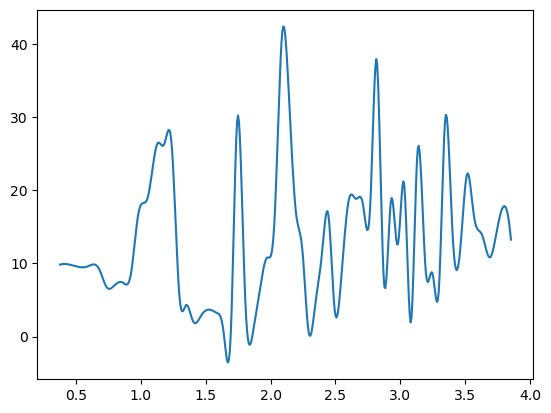

In [7]:
time_smooth_ltknee,angle_smooth_ltknee=smooth_data(time2plot,plotangle_ltknee,500,3)
plt.plot(time_smooth_ltknee,angle_smooth_ltknee)


In [31]:

count = 62
i=0
diff_ang_ltknee=[0] * (count-2)
while(i< (count-2)) :
    diff_ang_ltknee[i]=np.array((plotangle_ltknee[i+1]-plotangle_ltknee[i])/time2plot[i])
    i=i+1


In [32]:
diff_ang_ltknee

[array(-0.65455216),
 array(-0.02663119),
 array(-0.69580136),
 array(-3.54758176),
 array(0.46624547),
 array(0.32858078),
 array(1.44883533),
 array(8.98636713),
 array(2.17322821),
 array(6.92828647),
 array(-0.04722303),
 array(-0.05281532),
 array(-16.71623301),
 array(-0.95884877),
 array(-1.64237841),
 array(0.56165211),
 array(0.54860888),
 array(-0.30971753),
 array(-1.48985672),
 array(0.57690523),
 array(16.48194451),
 array(-13.74037289),
 array(-2.64453845),
 array(3.0241884),
 array(2.14540027),
 array(2.58344526),
 array(12.6834254),
 array(-4.04155952),
 array(-7.45987757),
 array(-2.48811109),
 array(-4.9306223),
 array(1.61184616),
 array(3.04650906),
 array(2.1411297),
 array(-5.34225356),
 array(1.83538126),
 array(4.15164583),
 array(0.04092268),
 array(-0.24386129),
 array(0.04446943),
 array(7.05504397),
 array(-10.79239496),
 array(3.92608057),
 array(-2.09405092),
 array(2.74093602),
 array(-6.19403269),
 array(7.4601368),
 array(-5.13020734),
 array(-0.0751312

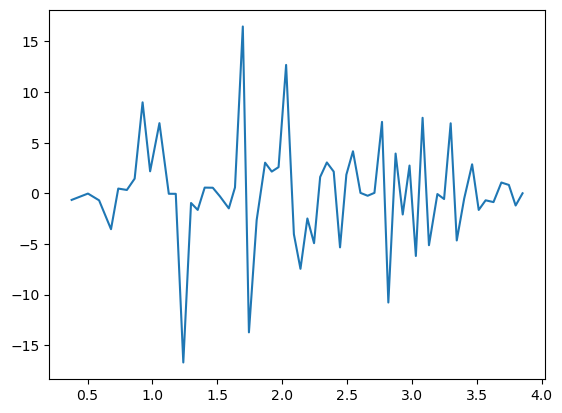

In [33]:
plt.plot(time2plot,diff_ang_ltknee)

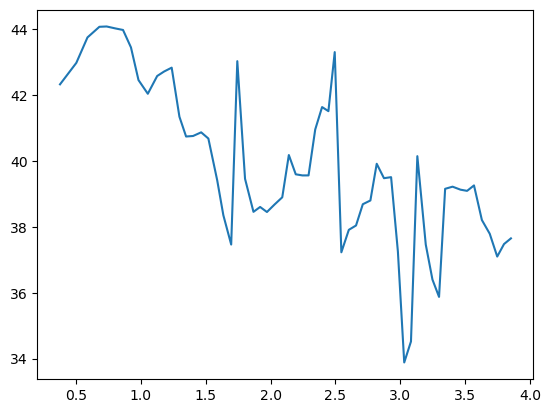

In [3]:
plt.plot(time2plot,plot_ylh)